<a href="https://colab.research.google.com/github/AlexanderDerango/CPI-Japan-Data-Analysis-Project/blob/main/CPI_Japan_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Libraries

In [1]:
!pip install kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")



Downloading Dataset from Kaggle

You will need a file called kaggle.json

Needs to contain Kaggle API key!!!

In [3]:
from google.colab import files
files.upload()  # <-- Upload kaggle.json here (Needs to contain API key!)

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
# Downloading Dataset

!kaggle datasets download -d yutodennou/consumer-price-index-of-japan-by-2022

!unzip consumer-price-index-of-japan-by-2022.zip -d cpi_japan

Dataset URL: https://www.kaggle.com/datasets/yutodennou/consumer-price-index-of-japan-by-2022
License(s): DbCL-1.0
  0% 0.00/73.6k [00:00<?, ?B/s]
100% 73.6k/73.6k [00:00<00:00, 221MB/s]
Archive:  consumer-price-index-of-japan-by-2022.zip
  inflating: cpi_japan/2022_Japan_CPI_GoodsAndServiceClassificationIndex.csv  
  inflating: cpi_japan/2022_Japan_CPI_compositeIndexExcludingImputedRent.csv  
  inflating: cpi_japan/2022_Japan_CPI_middleLevelClassificationIndex.csv  
  inflating: cpi_japan/2022_Japan_CPI_priceIndexByItems.csv  


This section reads out all the csv files

In [5]:
goods_services_raw = pd.read_csv("/content/cpi_japan/2022_Japan_CPI_GoodsAndServiceClassificationIndex.csv")
goods_services_raw.head()

# Note: This will not show all the columns and rows on user side

,Year,All items,"All items, less fresh food","All items, less imputed rent","All items, less imputed rent & fresh food","All items, less fresh food and energy","All items, less food (less alcoholic beverages) and energy",Food,Fresh food,"Food, less fresh food",...,Miscellaneous,Personal care services,Toilet articles,Personal effects,Tobacco,Other miscellaneous,Energy,Expenses for education,Expenses for culture & recreation,Expenses for information & communication
0,1970,31.4,31.7,31.7,32.1,31.5,32.1,29.1,25.1,30.2,...,28.4,15.5,68.2,23.9,20.2,11.7,35.8,NaN,NaN,NaN
1,1971,33.3,33.8,33.5,34.1,33.6,34.2,30.7,25.4,32.0,...,29.6,17.5,69.5,24.9,20.2,11.8,37.3,NaN,NaN,NaN
2,1972,35.2,35.7,35.2,35.9,35.6,36.3,32.2,26.1,33.9,...,30.9,20.0,69.1,26.0,20.2,12.0,37.9,NaN,NaN,NaN
3,1973,40.7,41.1,40.9,41.5,41.0,41.3,38.2,32.3,39.7,...,33.9,24.7,67.6,30.7,20.2,13.9,42.4,NaN,NaN,NaN
4,1974,49.1,49.6,49.8,50.6,49.3,48.6,47.3,39.5,49.5,...,39.9,33.9,75.1,37.7,20.2,14.9,56.9,NaN,NaN,NaN


In [6]:
composite_index_raw = pd.read_csv("/content/cpi_japan/2022_Japan_CPI_compositeIndexExcludingImputedRent.csv")
composite_index_raw.head()

# Note: This will not show all the columns and rows on user side

,Year,All items,Goods,"Goods, less fresh food","Agricultural, aquatic & livestock products","Fresh food, raw meats & cut flowers","Other agricultural, aquatic & livestock products",Rice,Industrial products,Food products,...,Imputed rent (non-wooden),Other services,Services related to domestic duties.1,Services related to medical care & welfare.1,Services related to education.1,"Services related to communication, culture & recreation",Durable goods,Semi-durable goods,Non-durable goods,Public utilities charges
0,1970,31.4,37.1,38.8,29.0,27.6,41.1,41.9,40.8,31.2,...,NaN,19.6,20.3,NaN,11.2,29.2,178.1,NaN,NaN,32.7
1,1971,33.3,38.8,40.9,29.6,28.3,41.3,42.1,43.1,33.4,...,NaN,21.7,22.6,NaN,12.1,38.9,174.7,NaN,NaN,33.2
2,1972,35.2,40.5,42.7,31.1,29.6,43.8,44.6,44.9,34.9,...,NaN,23.4,24.8,NaN,13.2,39.1,173.2,NaN,NaN,34.5
3,1973,40.7,47.7,49.9,36.8,36.2,47.0,47.8,53.2,41.3,...,NaN,27.3,30.5,NaN,14.6,43.1,185.3,NaN,NaN,35.3
4,1974,49.1,58.6,61.4,44.4,43.8,56.7,57.9,65.5,52.8,...,NaN,33.6,39.7,NaN,17.4,47.4,222.5,NaN,NaN,39.1


In [7]:
middle_level_raw = pd.read_csv("/content/cpi_japan/2022_Japan_CPI_middleLevelClassificationIndex.csv")
middle_level_raw.head()

# Note: This will not show all the columns and rows on user side

,Year,All_items,Food,Cereals,Rice,Non-glutinous_rice-A,Non-glutinous_rice-B,Bread,White_bread,Bean-jam_buns,...,All_items_less_imputed_rent,Housing_less_imputed_rent,Rent_less_imputed_rent,All_items_less_imputed_rent_&_fresh_food,Energy,All_items_less_fresh_food_and_energy,All_items_less_food_(less_alcoholic_beverages)_and_energy,Expenses_for_education,Expenses_for_culture_&_recreation,Expenses_for_information_&_communication
0,1970,31.4,29.1,33.8,41.9,NaN,NaN,26.5,28.1,23.4,...,31.7,24.4,31.4,32.1,35.8,31.5,32.1,NaN,NaN,NaN
1,1971,33.3,30.7,34.4,42.1,NaN,NaN,28.4,30.0,25.7,...,33.5,26.5,33.9,34.1,37.3,33.6,34.2,NaN,NaN,NaN
2,1972,35.2,32.2,36.5,44.6,NaN,NaN,30.5,32.5,26.6,...,35.2,28.6,36.8,35.9,37.9,35.6,36.3,NaN,NaN,NaN
3,1973,40.7,38.2,40.5,47.8,NaN,NaN,36.8,38.8,33.8,...,40.9,33.9,39.9,41.5,42.4,41.0,41.3,NaN,NaN,NaN
4,1974,49.1,47.3,50.8,57.8,NaN,NaN,48.3,51.1,43.7,...,49.8,40.5,42.9,50.6,56.9,49.3,48.6,NaN,NaN,NaN


In [8]:
price_index_raw = pd.read_csv("/content/cpi_japan/2022_Japan_CPI_priceIndexByItems.csv")
price_index_raw.head()

# Note: This will not show all the rows on user side

,Year,"All items, less imputed rent"
0,1946,NaN
1,1947,6.5
2,1948,10.9
3,1949,12.7
4,1950,12.2


Making copies of dataset

In [9]:
goods_services = goods_services_raw.copy()
middle_level = middle_level_raw.copy()
composite_index = composite_index_raw.copy()
price_index = price_index_raw.copy()

Data Cleaning Section

In [10]:
goods_services.info()
middle_level.info()
composite_index.info()
price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 79 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        53 non-null     int64  
 1   All items                                                   53 non-null     float64
 2   All items, less fresh food                                  53 non-null     float64
 3   All items, less imputed rent                                53 non-null     float64
 4   All items, less imputed rent & fresh food                   53 non-null     float64
 5   All items, less fresh food and energy                       53 non-null     float64
 6   All items, less food (less alcoholic beverages) and energy  53 non-null     float64
 7   Food                                                        53 non-null     float64
 8   Fr

In [11]:
# Here we will clean all data and cut columns

goods_services_clean = goods_services_raw.dropna(axis=1, thresh=53)
composite_index_clean = composite_index_raw.dropna(axis=1, thresh=53)
price_index_clean = price_index.dropna()
middle_level_clean = middle_level_raw.dropna(axis=1, thresh=53)


Research Question: What categories show the highest volatility in Japan’s CPI over the past 50 years?

Data Analysis Section

In [12]:
goods_services_pct = goods_services_clean.pct_change() * 100
volatility = goods_services_pct.std().sort_values(ascending=False)


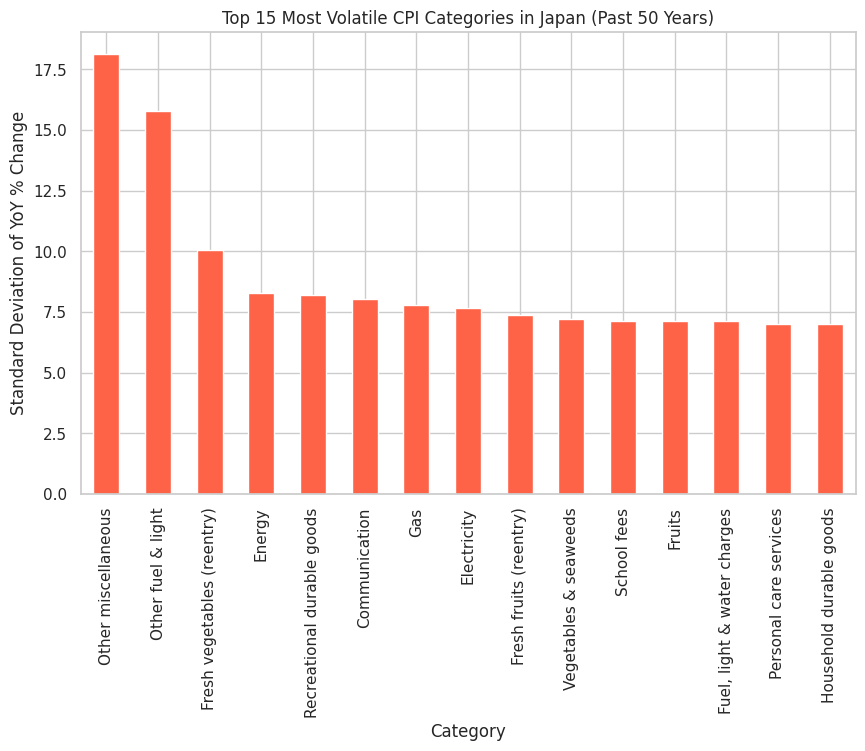

In [13]:
top15_volatility = volatility.head(15)

plt.figure(figsize=(10,6))
top15_volatility.plot(kind='bar', color='tomato')
plt.title("Top 15 Most Volatile CPI Categories in Japan (Past 50 Years)")
plt.ylabel("Standard Deviation of YoY % Change")
plt.xlabel("Category")
plt.savefig("Top_Volatile.png", dpi=300, bbox_inches="tight")
plt.show()


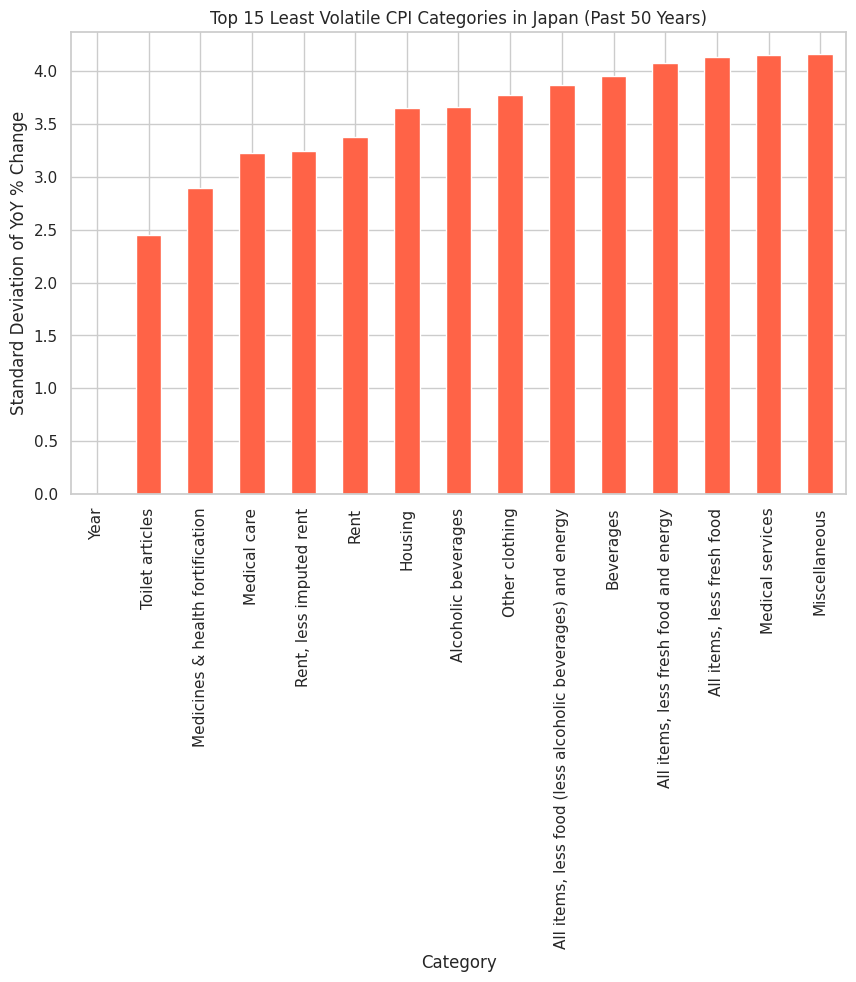

In [14]:

volatility_reverse = goods_services_pct.std().sort_values(ascending=True)

bottom15_volatility = volatility_reverse.head(15)

plt.figure(figsize=(10,6))
bottom15_volatility.plot(kind='bar', color='tomato')
plt.title("Top 15 Least Volatile CPI Categories in Japan (Past 50 Years)")
plt.ylabel("Standard Deviation of YoY % Change")
plt.xlabel("Category")
plt.savefig("Bottom_Volatile.png", dpi=300, bbox_inches="tight")
plt.show()


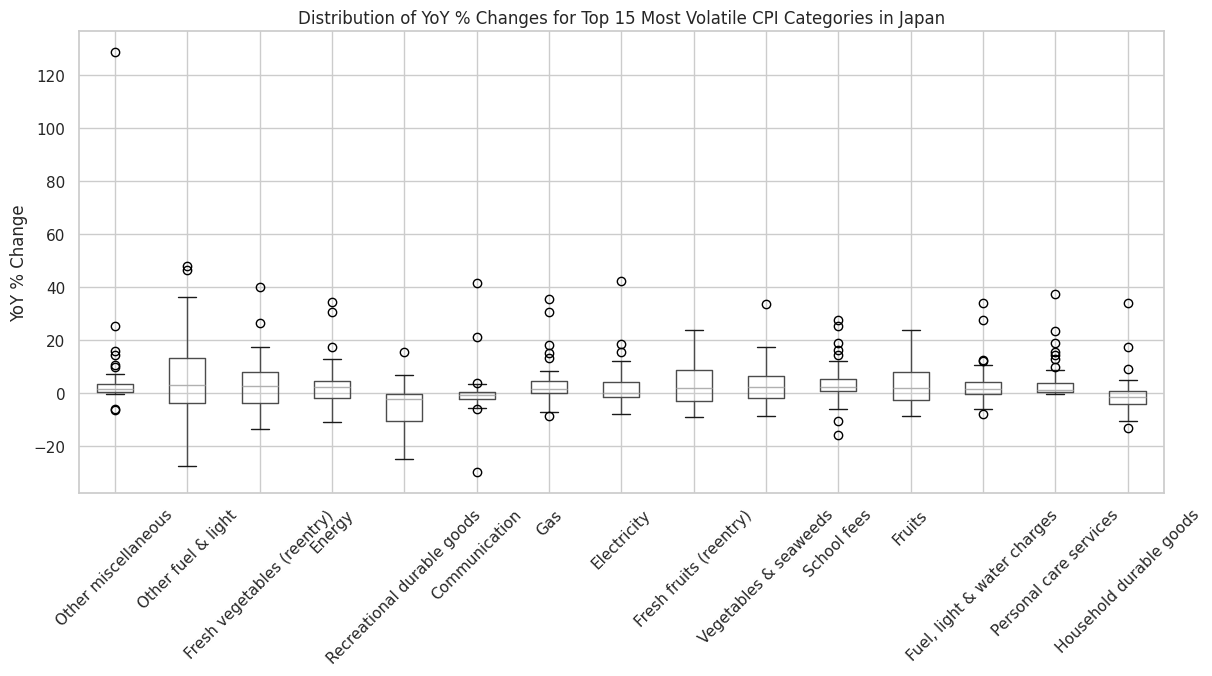

In [15]:
top15_categories = volatility.head(15).index
plt.figure(figsize=(14,6))
goods_services_pct[top15_categories].boxplot()
plt.title("Distribution of YoY % Changes for Top 15 Most Volatile CPI Categories in Japan")
plt.ylabel("YoY % Change")
plt.xticks(rotation=45)
plt.savefig("Top_Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

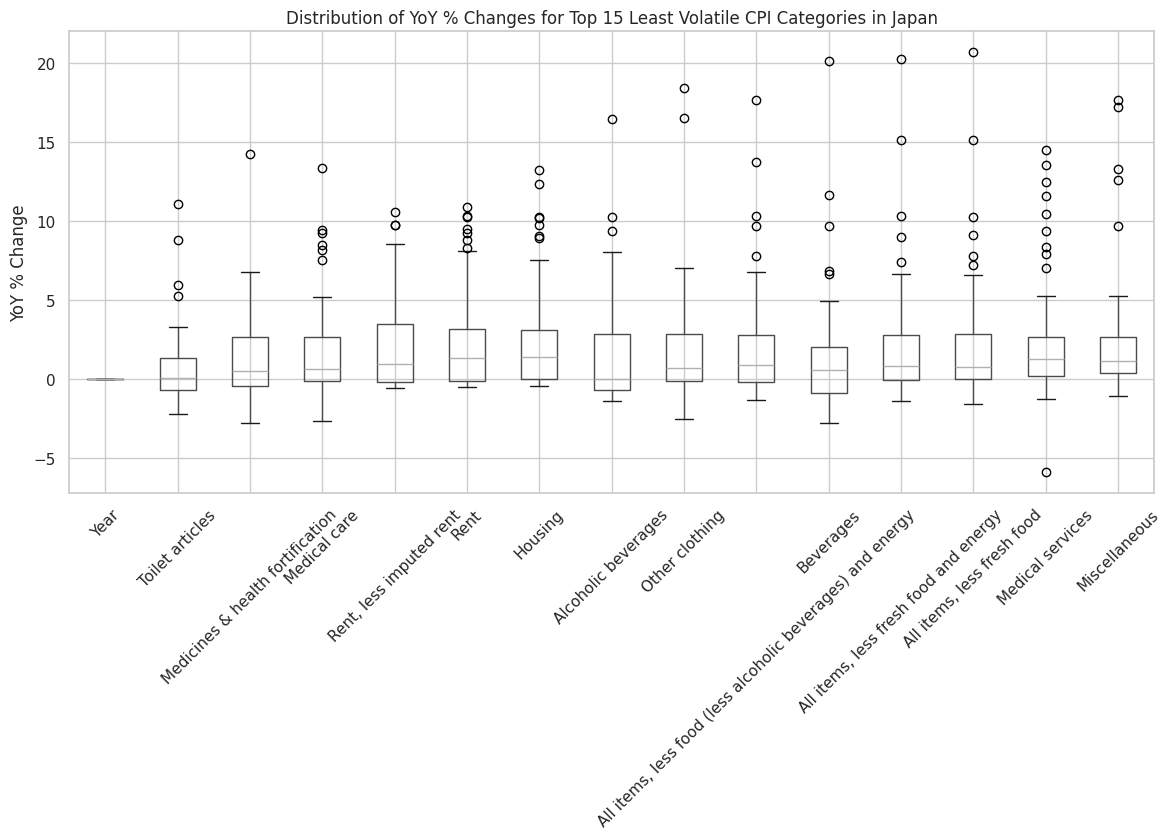

In [16]:
bottom15_categories = volatility_reverse.head(15).index
plt.figure(figsize=(14,6))
goods_services_pct[bottom15_categories].boxplot()
plt.title("Distribution of YoY % Changes for Top 15 Least Volatile CPI Categories in Japan")
plt.ylabel("YoY % Change")
plt.xticks(rotation=45)
plt.savefig("Bottom_Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

Here I am plotting CPI based on a single category

In [17]:
def plot_cpi_with_events(df, category):
    """
    Plot CPI trend for a given category with major economic events including Japan's Lost Decade as markers.

    df: DataFrame with 'Year' column and CPI categories
    category: string, name of the CPI category
    """
    if category not in df.columns:
        raise ValueError(f"{category} not found in DataFrame columns.")

    plt.figure(figsize=(12,6))
    plt.plot(df["Year"], df[category], label=category, color="tab:red")

    # Major event markers
    events = {
        "1973 Oil Shock": 1973,
        "1979 Oil Shock": 1979,
        "2008 Financial Crisis": 2008,
        "COVID-19": 2020,
        "Lost Decade Start": 1991,
        "Lost Decade End": 2001
    }

    for event, year in events.items():
        plt.axvline(x=year, color="grey", linestyle="--", alpha=0.7)
        plt.text(year+0.2, df[category].max()*0.95, event, rotation=0, fontsize=8, alpha=0.7)

    plt.title(f"CPI Trend for {category} in Japan with Major Economic Events")
    plt.xlabel("Year")
    plt.ylabel("Index Value")
    plt.legend()
    filename = f"CPI_{category.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()


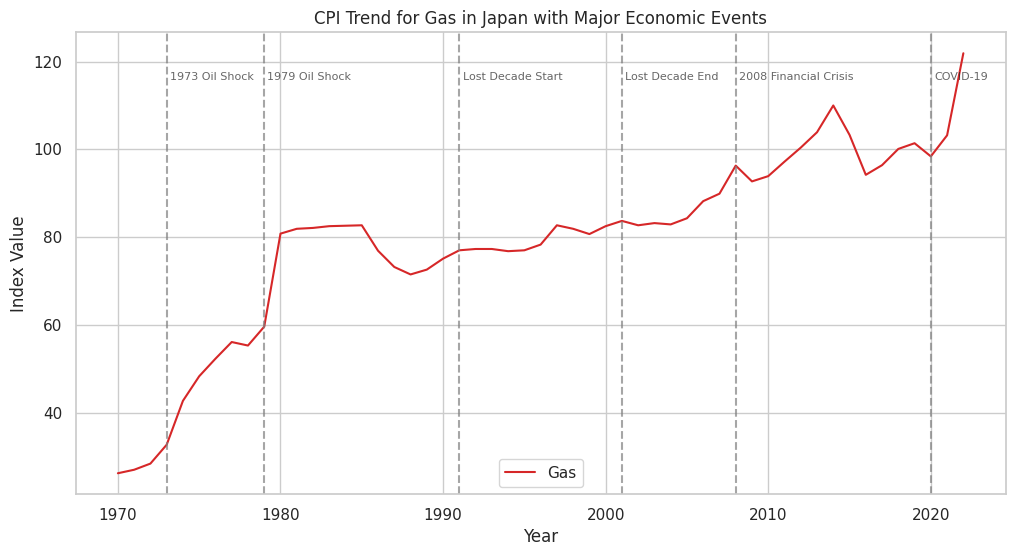

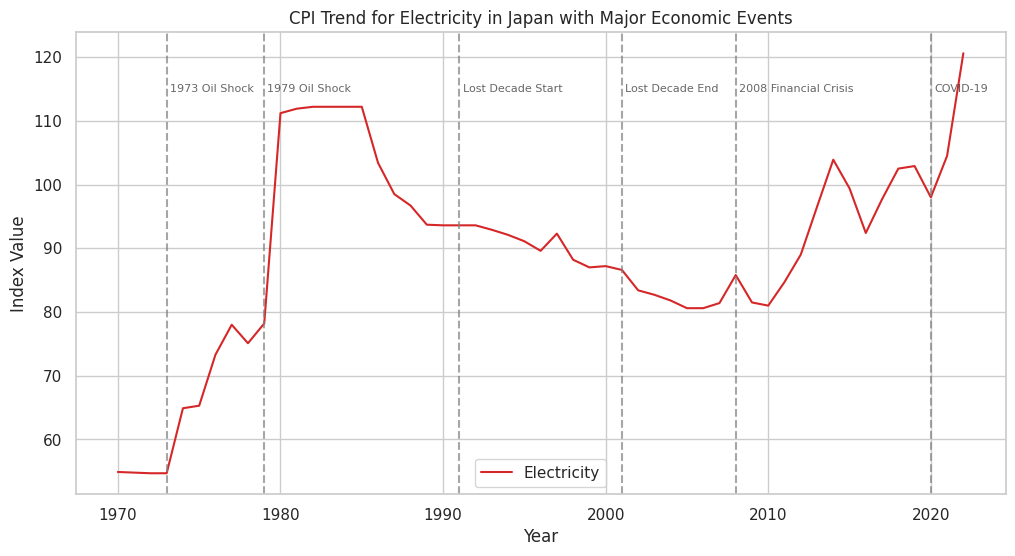

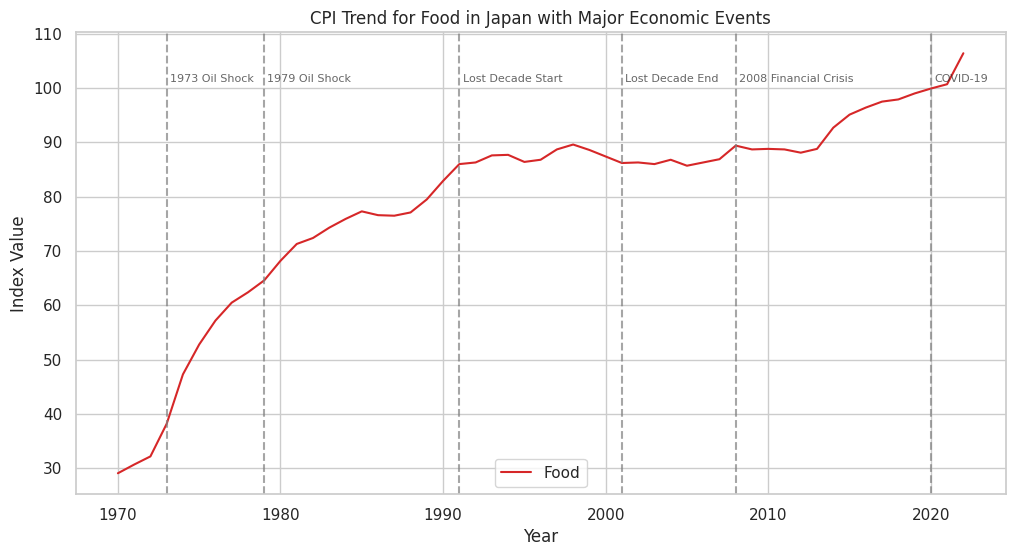

In [18]:
plot_cpi_with_events(goods_services_clean, "Gas")
plot_cpi_with_events(goods_services_clean, "Electricity")
plot_cpi_with_events(goods_services_clean, "Food")

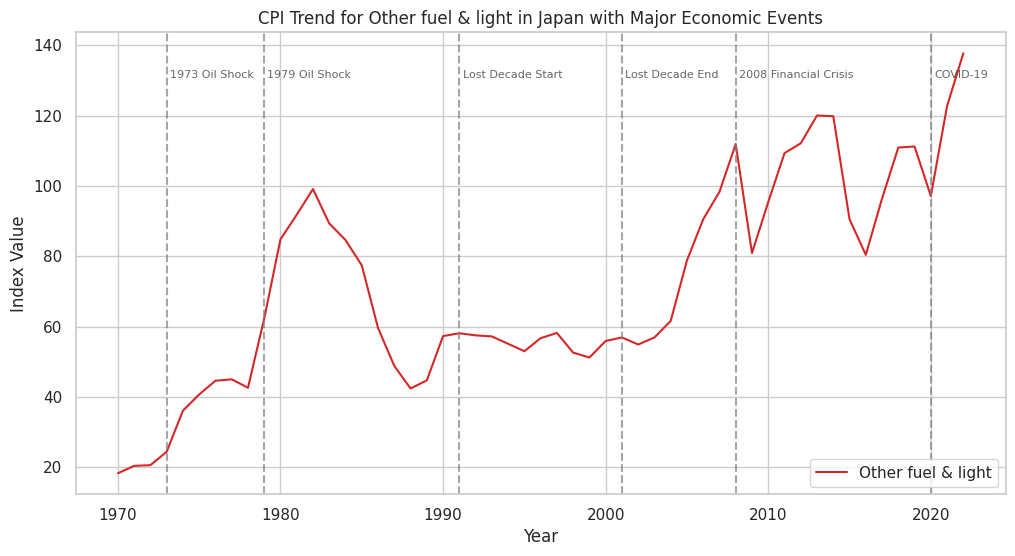

In [19]:
plot_cpi_with_events(goods_services_clean, "Other fuel & light")

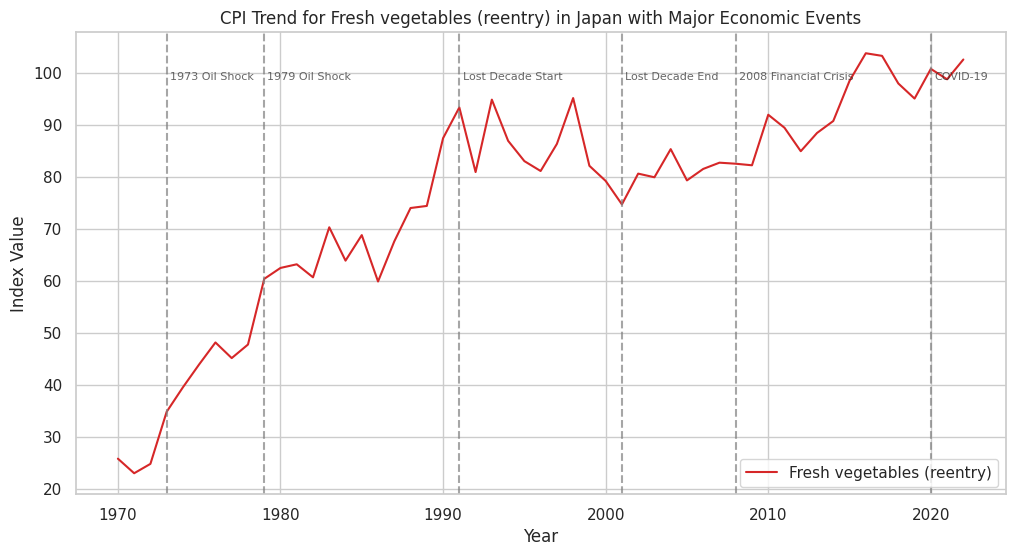

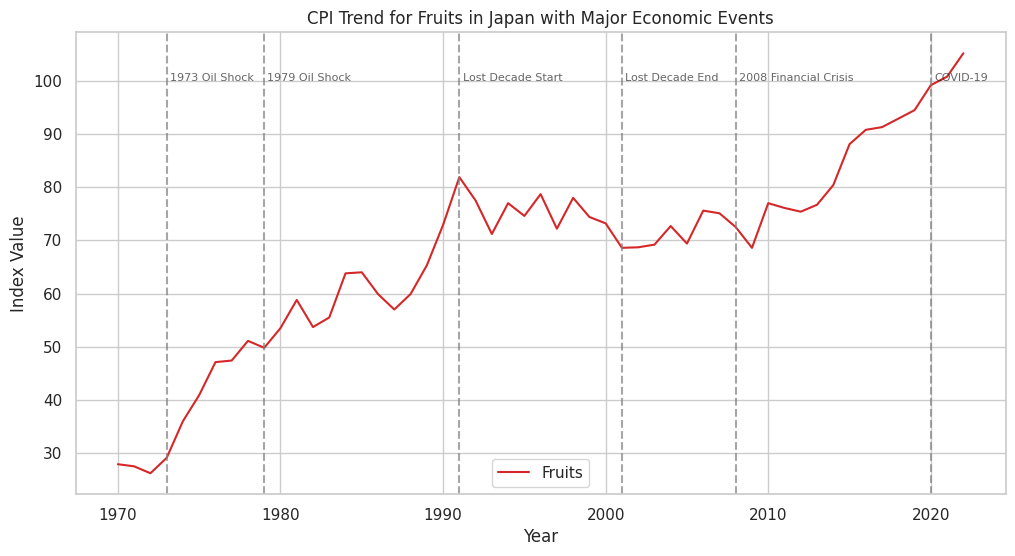

In [20]:
plot_cpi_with_events(goods_services_clean, "Fresh vegetables (reentry)")
plot_cpi_with_events(goods_services_clean, "Fruits")

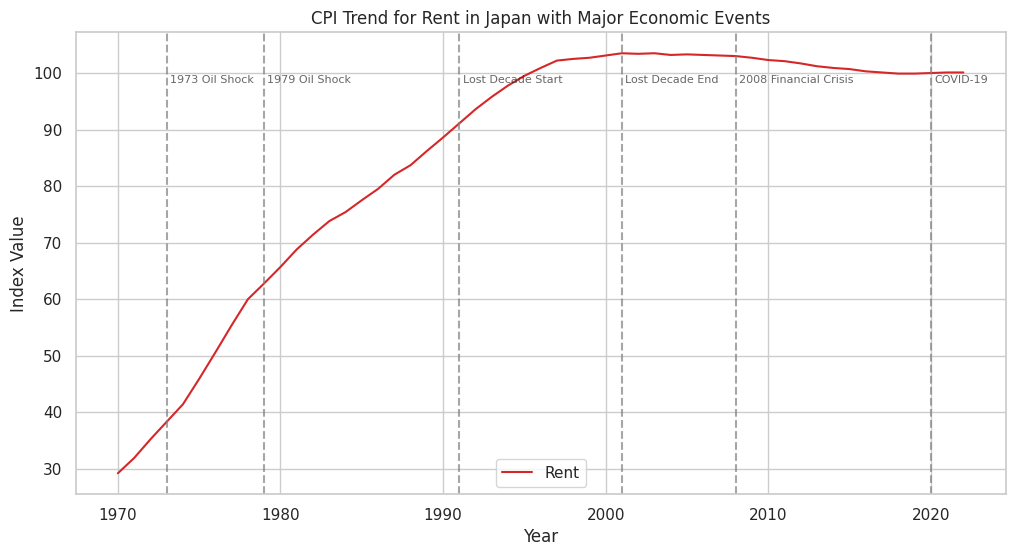

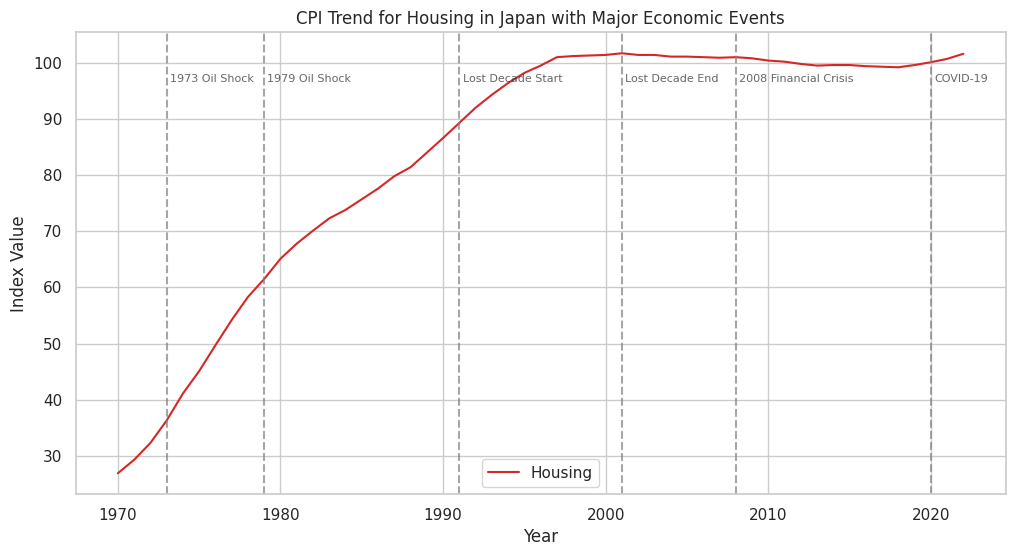

In [21]:
plot_cpi_with_events(goods_services_clean, "Rent")
plot_cpi_with_events(goods_services_clean, "Housing")

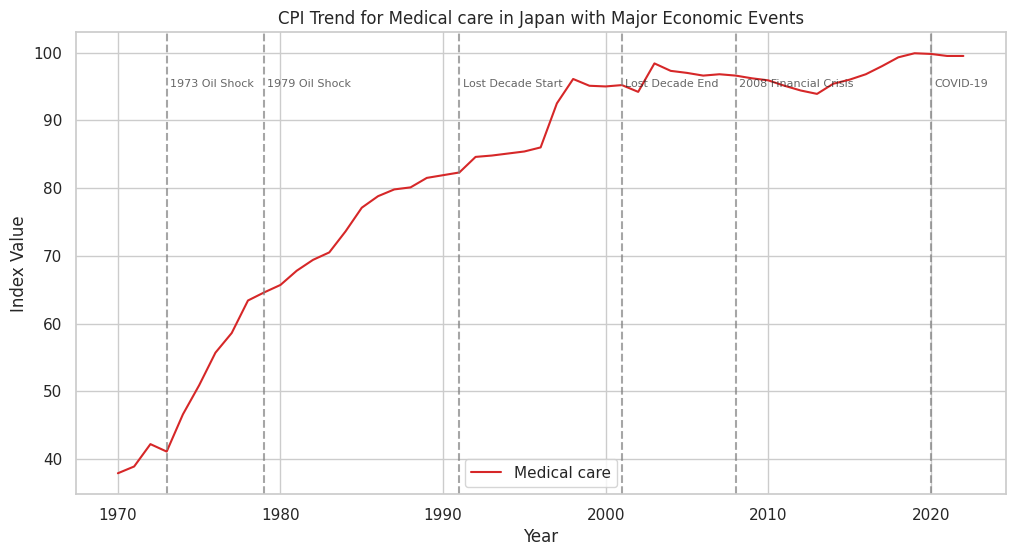

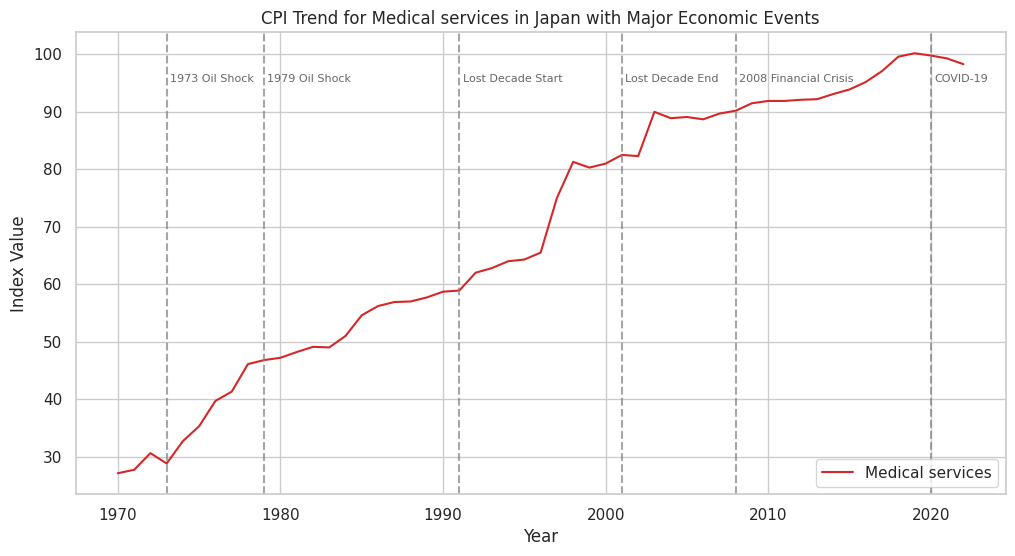

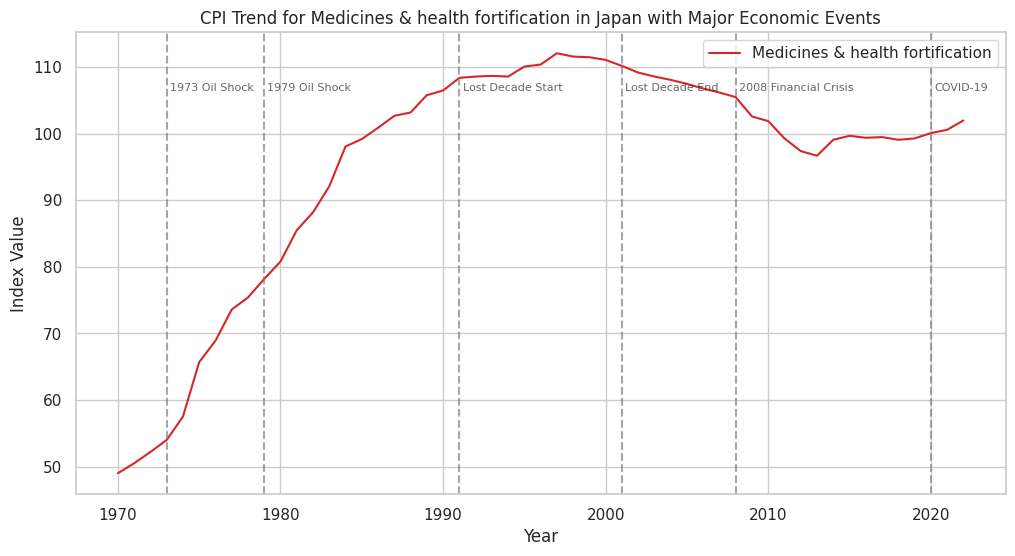

In [22]:
plot_cpi_with_events(goods_services_clean, "Medical care")
plot_cpi_with_events(goods_services_clean, "Medical services")
plot_cpi_with_events(goods_services_clean, "Medicines & health fortification")

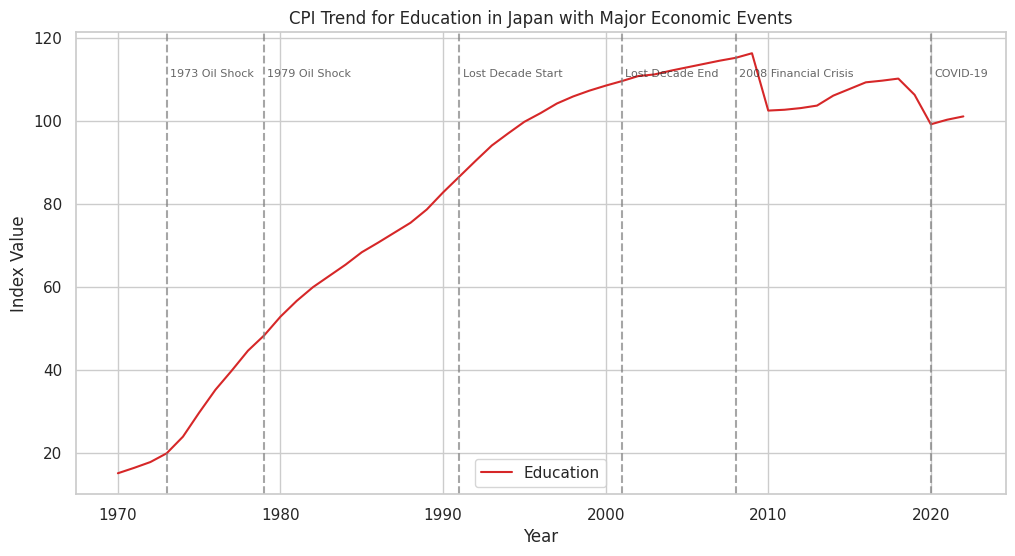

In [23]:
plot_cpi_with_events(goods_services_clean, "Education")

Here I am plotting Rolling Volatility on the same categories

In [24]:
import matplotlib.pyplot as plt

def plot_rolling_volatility(df, category, window=5, save=True):
    """
    Plot rolling volatility for a CPI category with major economic events.

    df: DataFrame with 'Year' column and CPI categories
    category: string, CPI category to analyze
    window: int, size of rolling window (years)
    save: bool, whether to save figure automatically
    """
    if category not in df.columns:
        raise ValueError(f"{category} not found in DataFrame columns.")

    # Calculate rolling volatility
    rolling_vol = df[category].rolling(window=window).std()

    plt.figure(figsize=(12,6))
    plt.plot(df["Year"], rolling_vol, label=f"{category} Rolling Volatility", color="tab:blue")

    # Major event markers
    events = {
        "1973 Oil Shock": 1973,
        "1979 Oil Shock": 1979,
        "2008 Financial Crisis": 2008,
        "COVID-19": 2020,
        "Lost Decade Start": 1991,
        "Lost Decade End": 2001
    }

    for event, year in events.items():
        plt.axvline(x=year, color="grey", linestyle="--", alpha=0.7)
        plt.text(year+0.2, rolling_vol.max()*0.95, event, rotation=0, fontsize=9, alpha=0.7)

    plt.title(f"{category} Rolling Volatility (Window={window} Years)")
    plt.xlabel("Year")
    plt.ylabel("Volatility (Standard Deviation)")
    plt.legend()

    if save:
        filename = f"RollingVolatility_{category.replace(' ', '_')}.png"
        plt.savefig(filename, dpi=300, bbox_inches="tight")
        print(f"Saved plot as {filename}")

    plt.show()


Saved plot as RollingVolatility_Electricity.png


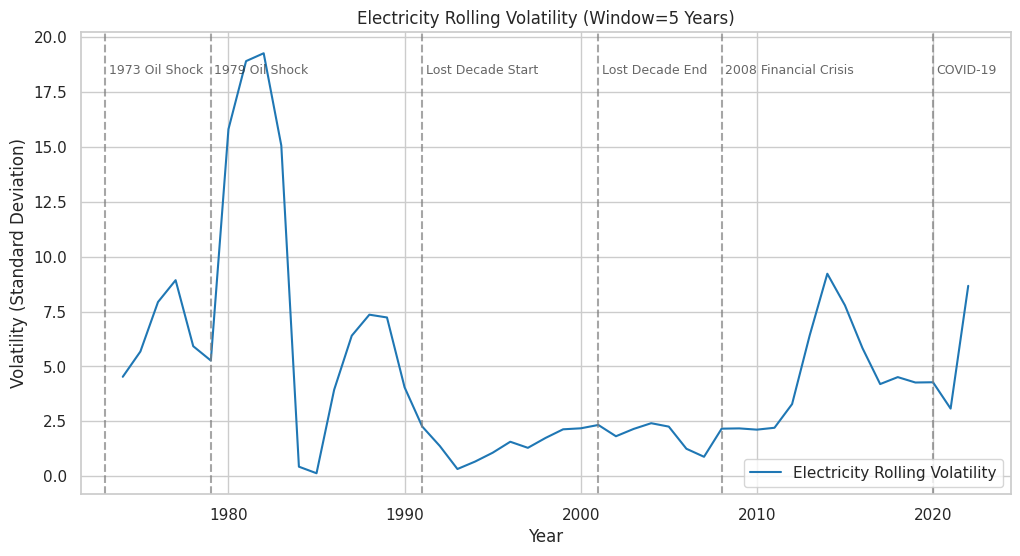

Saved plot as RollingVolatility_Education.png


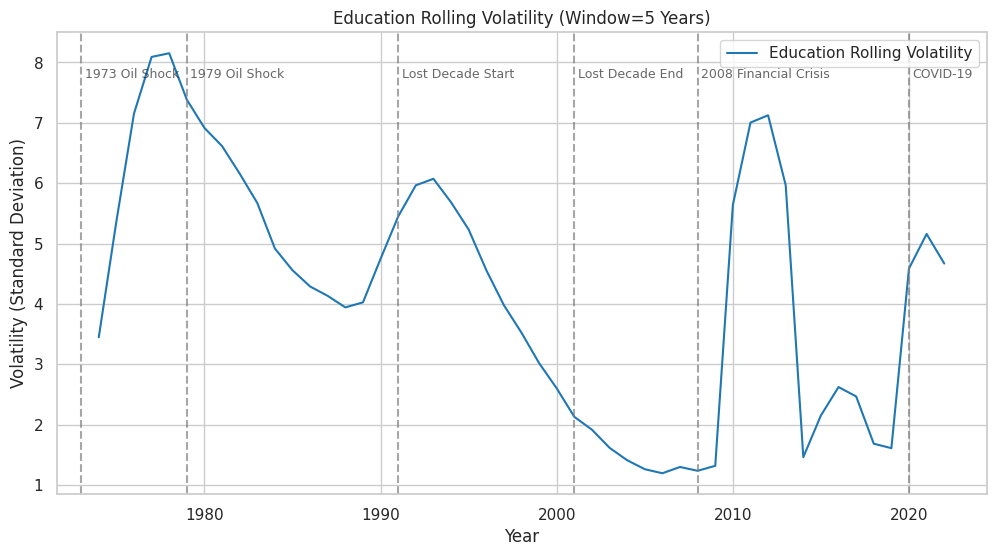

Saved plot as RollingVolatility_Food.png


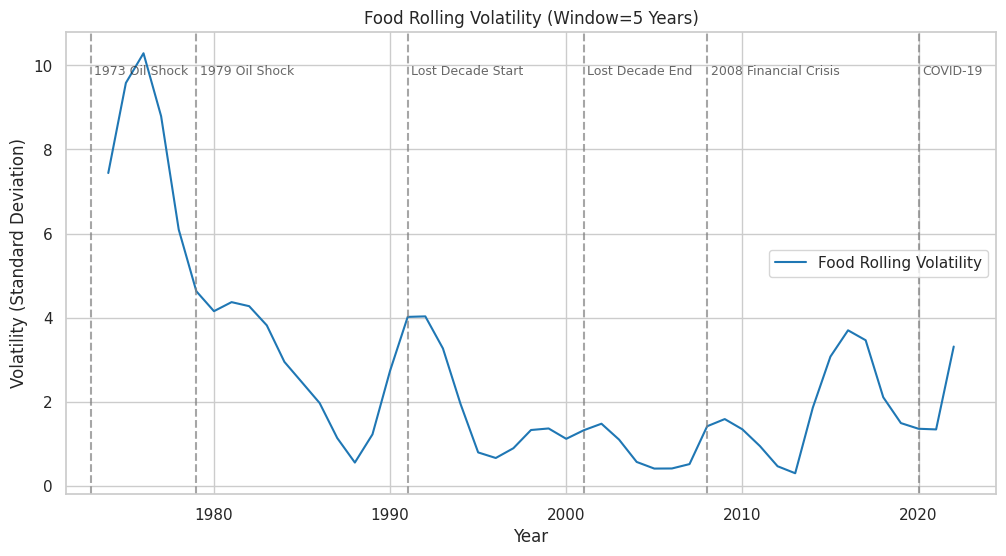

Saved plot as RollingVolatility_Fresh_vegetables_(reentry).png


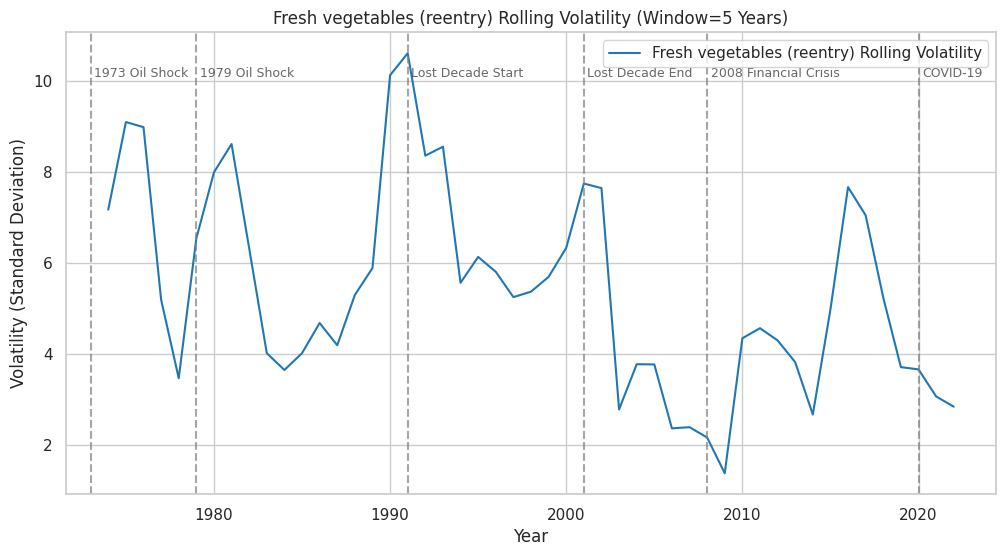

Saved plot as RollingVolatility_Fruits.png


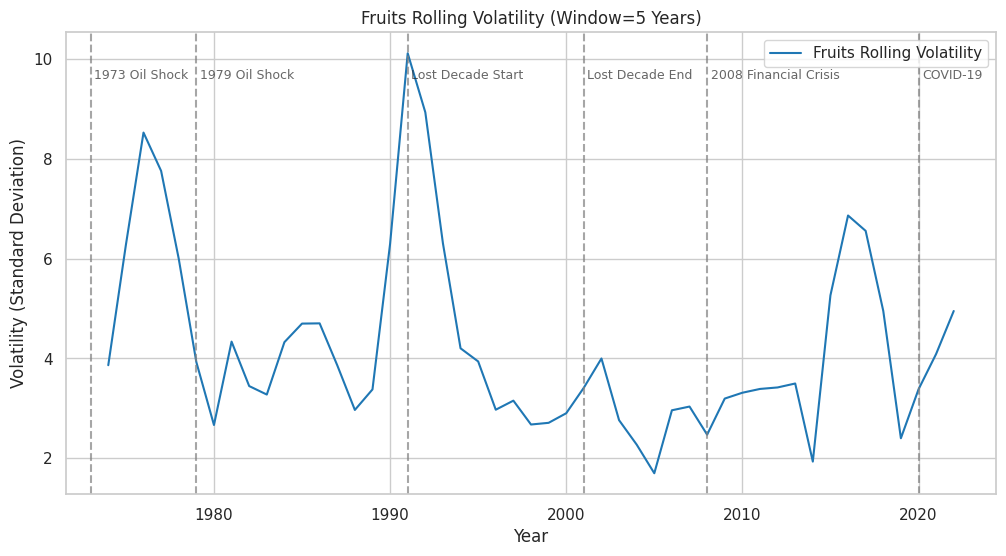

Saved plot as RollingVolatility_Gas.png


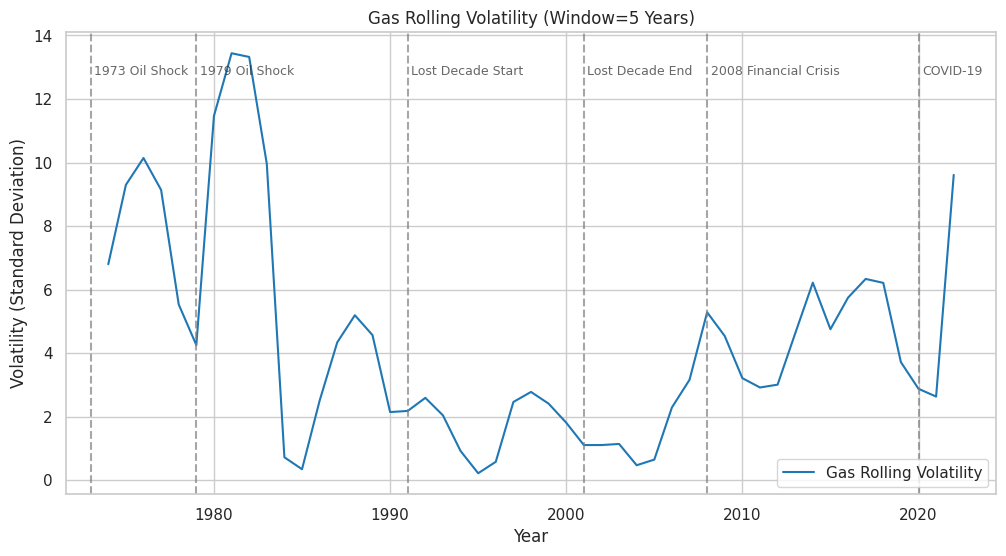

Saved plot as RollingVolatility_Housing.png


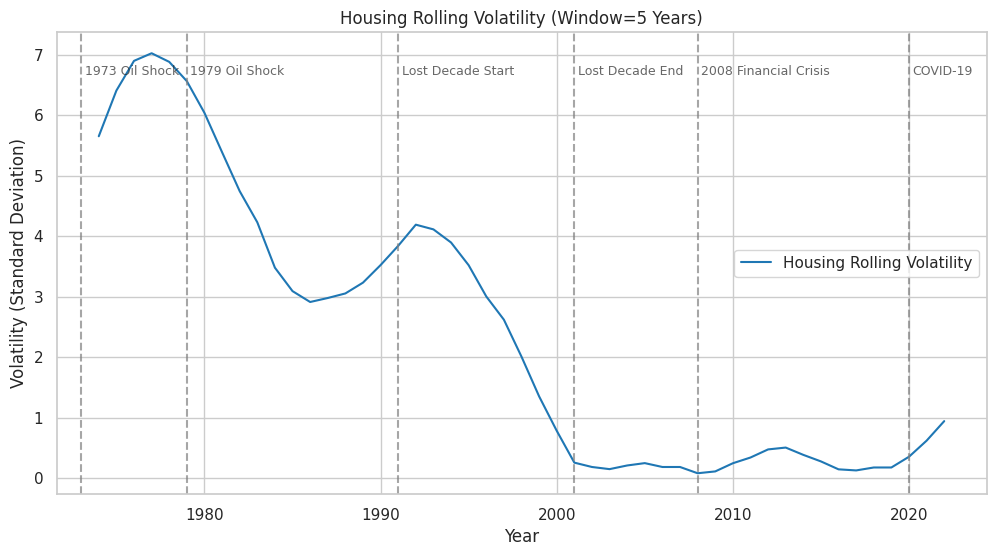

Saved plot as RollingVolatility_Medical_care.png


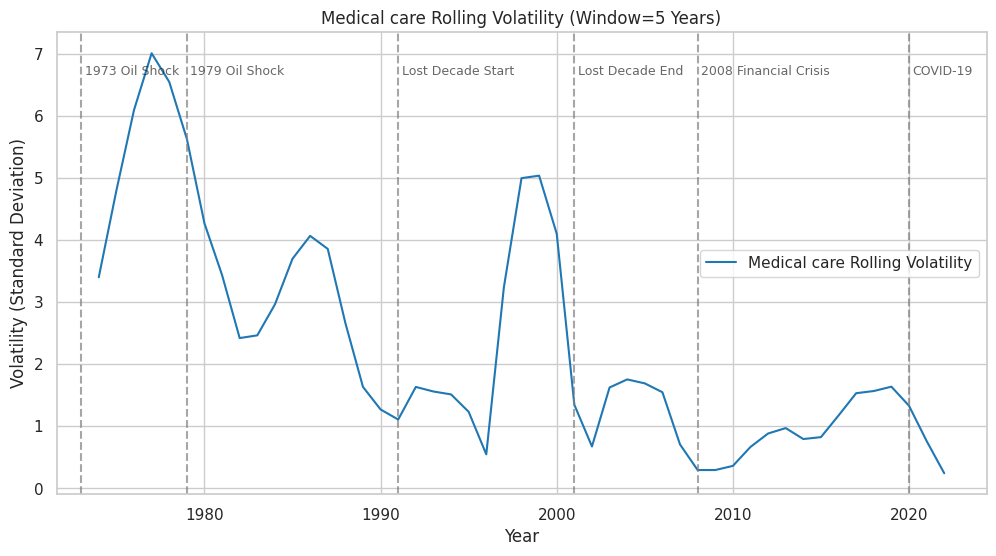

Saved plot as RollingVolatility_Medical_services.png


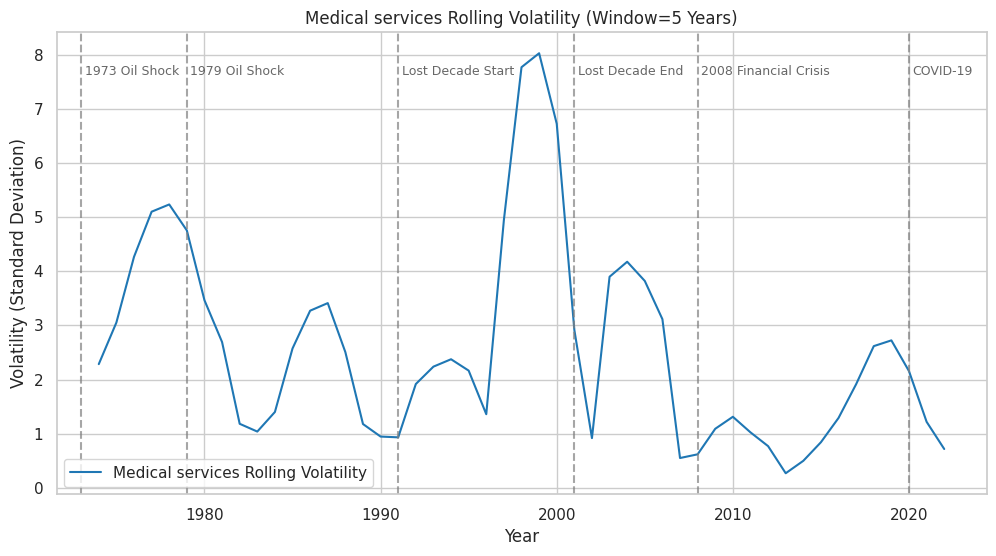

Saved plot as RollingVolatility_Medicines_&_health_fortification.png


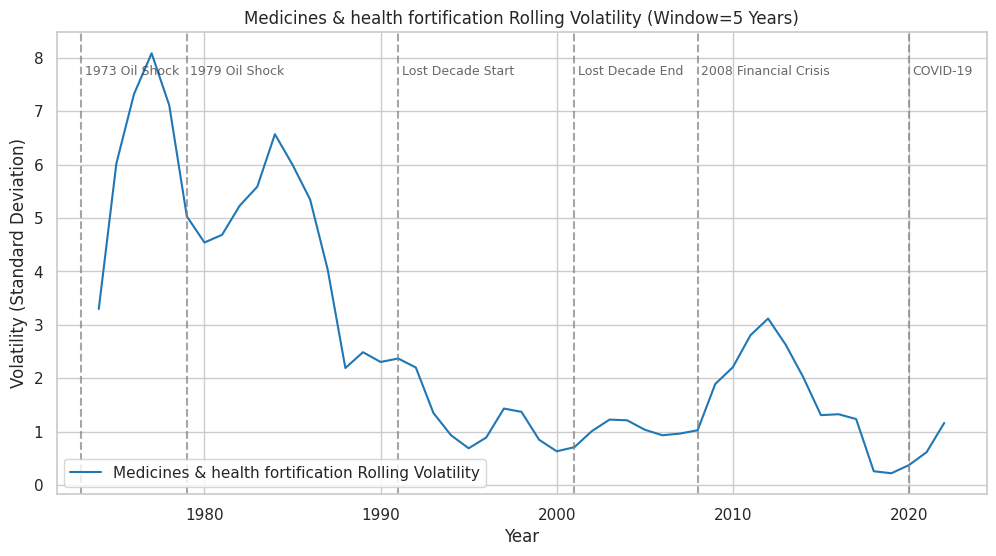

Saved plot as RollingVolatility_Other_fuel_&_light.png


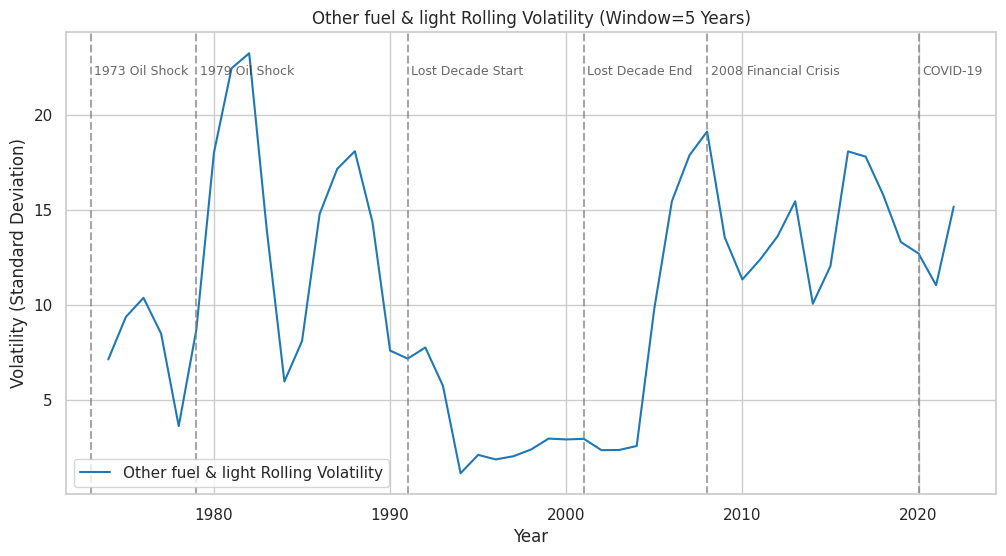

Saved plot as RollingVolatility_Rent.png


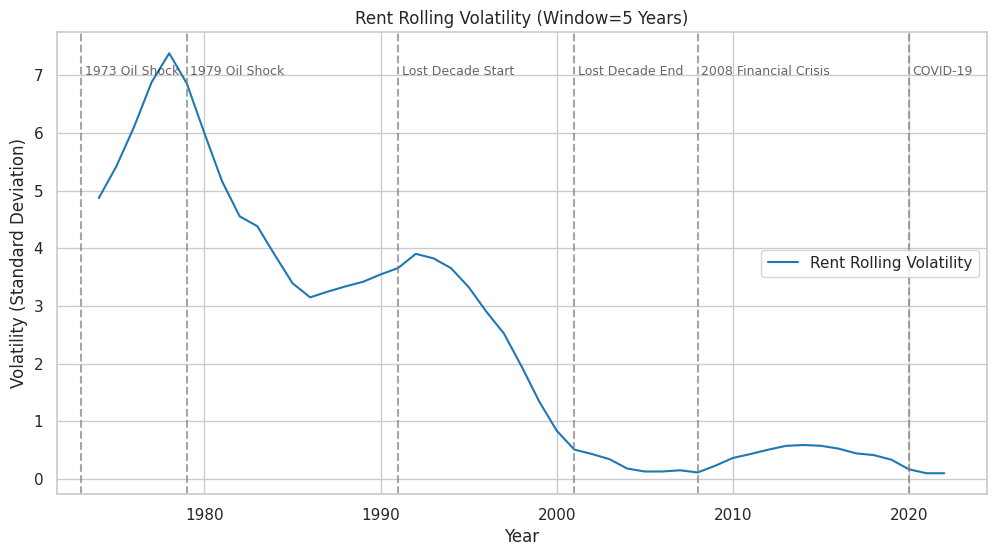

In [25]:
plot_rolling_volatility(goods_services_clean, "Electricity", window=5)
plot_rolling_volatility(goods_services_clean, "Education", window=5)
plot_rolling_volatility(goods_services_clean, "Food", window=5)
plot_rolling_volatility(goods_services_clean, "Fresh vegetables (reentry)", window=5)
plot_rolling_volatility(goods_services_clean, "Fruits", window=5)
plot_rolling_volatility(goods_services_clean, "Gas", window=5)
plot_rolling_volatility(goods_services_clean, "Housing", window=5)
plot_rolling_volatility(goods_services_clean, "Medical care", window=5)
plot_rolling_volatility(goods_services_clean, "Medical services", window=5)
plot_rolling_volatility(goods_services_clean, "Medicines & health fortification", window=5)
plot_rolling_volatility(goods_services_clean, "Other fuel & light", window=5)
plot_rolling_volatility(goods_services_clean, "Rent", window=5)

This is the end of the Google Colab. Feel free to mess around with other categories if you choose to run this!